In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## About the Dataset

This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [2]:
df = pd.read_csv('/content/drive/MyDrive/loan.csv')


In [3]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data visualization and pre-processing

In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [6]:
import seaborn as sns

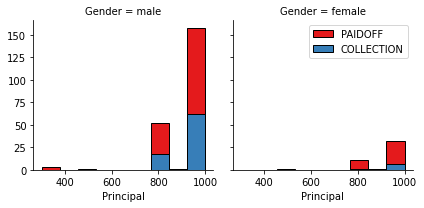

In [7]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

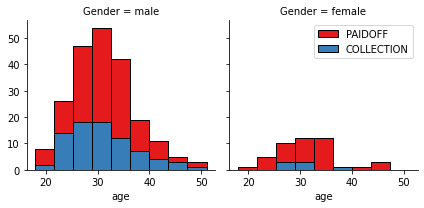

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction

### Let's look at the day of the week people get the loan

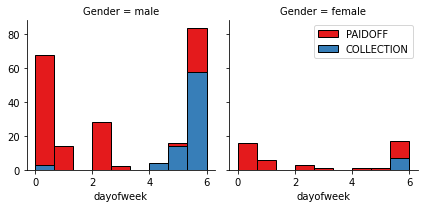

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4

In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x:1 if (x>3) else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [11]:
df['weekend'].value_counts()

1    205
0    141
Name: weekend, dtype: int64

# Convert Categorical features to numerical values

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
# converting male to 0 and female to 1
df['Gender'].replace(to_replace=['male','female'],value = [0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# One Hot Encoding

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [16]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(['Master or Above'],axis=1,inplace = True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


# Feature Selection

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [19]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [20]:
y = df['loan_status'].values
y[:5]

array([0, 0, 0, 0, 0])

# Classification

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

K Nearest Neighbor(KNN)
Decision Tree
Support Vector Machine
Logistic Regression
__ Notice:__

You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)

### Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
print('Train set:',X_train.shape, y_train.shape)
print('Test set:' ,X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(276, 8)

(276,)

(70, 8)

(70,)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)
X_train[0:5]

array([[ 0.56081126, -0.9677917 ,  0.69858179, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126,  0.9437816 , -0.81959596, -0.40565621,  0.85146932,
        -0.40565621,  1.10716144, -0.82639387],
       [ 0.56081126,  0.9437816 ,  0.02383612, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126, -0.9677917 , -0.98828237, -0.40565621,  0.85146932,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126,  0.9437816 , -0.48222312, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674]])

In [25]:
# Let's start the algorithm with k=4 for now:

In [31]:
# we will be checking for values of k from 0 to 30 so,
n = 30
accuracy = np.zeros(n)
for i in range(1,n+1):
  clf = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  y_test_predicted = clf.predict(X_test)
  accuracy[i-1] = (accuracy_score(y_test , y_test_predicted))
accuracy

array([0.64285714, 0.75714286, 0.74285714, 0.74285714, 0.7       ,
       0.78571429, 0.74285714, 0.74285714, 0.74285714, 0.75714286,
       0.67142857, 0.71428571, 0.68571429, 0.7       , 0.68571429,
       0.68571429, 0.65714286, 0.68571429, 0.67142857, 0.7       ,
       0.7       , 0.7       , 0.68571429, 0.71428571, 0.67142857,
       0.78571429, 0.75714286, 0.8       , 0.77142857, 0.78571429])

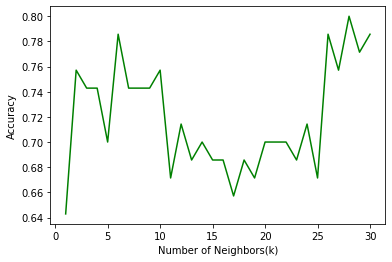

In [33]:
plt.plot(range(1,n+1),accuracy,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(k)')
plt.show()

In [35]:
accuracy = pd.DataFrame(accuracy)
print('Max accuracy got is - ')
accuracy.sort_values(by=0,ascending=False)[0:3]

Max accuracy got is - 


,0
27,0.800000
29,0.785714
5,0.785714


In [39]:
clf_KNN = KNeighborsClassifier(n_neighbors = 27).fit(X_train,y_train)
y_pred = clf_KNN.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf2 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print('Acuuracy using entropy criterion - ',accuracy_score(y_test,y_pred))

Acuuracy using entropy criterion -  0.7


In [78]:
clf_DT = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)

## Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [47]:
clf3 = SVC(kernel = 'rbf').fit(X_train,y_train)
y_pred = clf3.predict(X_test)
print('Accuracy using Radial basic function Kernel - ', accuracy_score(y_test,y_pred))

Accuracy using Radial basic function Kernel -  0.7428571428571429


In [79]:
clf_SVM = SVC(kernel = 'rbf').fit(X_train,y_train)

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [50]:
LGR = LogisticRegression(solver = 'lbfgs',warm_start = True)
y_pred = LGR.fit(X_train,y_train)
print('Accuracy score is - ',y_test,y_pred)

Accuracy score is -  [0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0] LogisticRegression(warm_start=True)


## Model Evaluation using Test set

In [83]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [58]:
df.head(10)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
5,0,1000,30,2016-09-09,2016-10-08,36,college,0,4,1
6,0,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
7,0,800,15,2016-09-10,2016-09-24,26,college,0,5,1
8,0,300,7,2016-09-10,2016-09-16,29,college,0,5,1
9,0,1000,15,2016-09-10,2016-10-09,39,High School or Below,0,5,1


In [61]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [64]:
X_t = df[['Principal','terms','age','Gender','weekend']]
X_t = pd.concat([X_t,pd.get_dummies(df['education'])], axis=1)
X_t.drop(['Master or Above'], axis = 1,inplace=True)
X_t.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [65]:
X_t = preprocessing.StandardScaler().fit_transform(X_t)
X_t[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [66]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [68]:
y_t = df['loan_status'].values
y_t[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
Jaccard = np.full(4,np.nan)
F1_score = np.full(4,np.nan)
Logloss = np.full(4, np.nan)
Algorithm = np.array(4)
Algorithm = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]

In [80]:
Jaccard[0] = jaccard_score(y_t, clf_KNN.predict(X_t))
Jaccard[1] = jaccard_score(y_t, clf_DT.predict(X_t))
Jaccard[2] = jaccard_score(y_t, clf_SVM.predict(X_t))
Jaccard[3] = jaccard_score(y_t, LGR.predict(X_t))

In [85]:
F1_score[0] = f1_score(y_t, clf_KNN.predict(X_t))
F1_score[1] = f1_score(y_t, clf_DT.predict(X_t))
F1_score[2] = f1_score(y_t, clf_SVM.predict(X_t))
F1_score[3] = f1_score(y_t, LGR.predict(X_t))

In [87]:
Report = pd.DataFrame({"Jaccard":Jaccard, "F1-score":F1_score, "LogLoss":'NaN'}, index=Algorithm)

In [88]:
Report

,Jaccard,F1-score,LogLoss
KNN,0.190909,0.320611,NaN
Decision Tree,0.564356,0.721519,NaN
SVM,0.303571,0.465753,NaN
LogisticRegression,0.212963,0.351145,NaN
